### Configurable Variables
Variables that can be modified in this notebook or None
- `top_frac` - quantile to filter out the datasets
- `input_data` — path to the input folder containing the dataset
- `supress_warnings` — boolean flag to enable/disable warning messages (`True`/`False`)
---
**Set following variables if you are running notebook interactively.**

In [50]:
top_frac_default = 0.1
input_path_folder_default = "somde_results/SN124_A938797_Rep2/"
suppress_warnings_default = False

### Load variables from CMD

In [51]:
SUPPRESS_WARNINGS = None
try:
    if suppress_warnings == "True":
        SUPPRESS_WARNINGS = True
    else:
        SUPPRESS_WARNINGS = False
except NameError:
    SUPPRESS_WARNINGS = suppress_warnings_default

try:
    TOP_FRAC = top_frac_default
except NameError:
    TOP_FRAC = top_frac_default

## Suppress Warnings (Optional)

* Suppress warnings for cleaner output.
* Comment out the line below if warnings are desired for debugging.

In [52]:
# Suppress warnings for cleaner output
import warnings
import os

if SUPPRESS_WARNINGS:
    print("Ignoring warnings.")
    warnings.filterwarnings('ignore')

### Environment setup

1. Install the necessary packages using `pip` if they are not already installed:

In [26]:
!pip install matplotlib pandas numpy seaborn matplotlib_venn --quiet
%matplotlib inline


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


2. Import necessary libraries:

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns
import sys
import os
from sklearn.preprocessing import MinMaxScaler

3. load the dataset
  * **Option 1**: Import data directly from Google Drive (requires Google Colab).
  * **Option 2**: Load dataset path from CMD.

In [28]:
# OPTION 1
# from google.colab import drive
# drive.mount('/content/drive')

In [54]:
# OPTION 2
DATA_PATH = None
try:
    DATA_PATH = input_data_folder
except NameError:
    DATA_PATH = input_path_folder_default

if DATA_PATH is None or not os.path.exists(DATA_PATH):
    print("ERROR: Datapath (", DATA_PATH ,") not found.")
    sys.exit()

print("Using input path:", DATA_PATH)

DATA_FOLDER_NAME = DATA_PATH.split("/")[-2].strip()
output_dir = os.path.join("figures/show/method_comparison/" + DATA_FOLDER_NAME)
os.makedirs(output_dir, exist_ok=True)

os.makedirs("method_comparison/" + DATA_FOLDER_NAME, exist_ok=True)

Using input path: somde_results/SN124_A938797_Rep2/


# Method comparison plots - SVGs

### Load data

In [56]:
somde_res = pd.read_csv("somde_results/" + DATA_FOLDER_NAME + "/somde_result.csv")
spatialde_res = pd.read_csv("spatialde_results/" + DATA_FOLDER_NAME + "/results.csv")

### Select SVGs based on input quantile

In [57]:
# FSV cutoff
somde_fsv_cut = somde_res["FSV"].quantile(1 - TOP_FRAC)
spatialde_fsv_cut = spatialde_res["FSV"].quantile(1 - TOP_FRAC)

# Select top 10% FSV
somde_top_fsv = somde_res[somde_res["FSV"] >= somde_fsv_cut]
spatialde_top_fsv = spatialde_res[spatialde_res["FSV"] >= spatialde_fsv_cut]

set_somde_fsv = set(somde_top_fsv["g"])
set_spatialde_fsv = set(spatialde_top_fsv["g"])
print("=== Top 10% by FSV ===")
print("SOMDE:", len(set_somde_fsv))
print("SpatialDE:", len(set_spatialde_fsv))

=== Top 10% by FSV ===
SOMDE: 4103
SpatialDE: 2052


In [58]:
# q-value cutoff
somde_qval_cut = somde_res["qval"].quantile(TOP_FRAC)
spatialde_qval_cut = spatialde_res["qval"].quantile(TOP_FRAC)

# Select top 10% qvalue
somde_top_qval = somde_res[somde_res["qval"] <= somde_qval_cut]
spatialde_top_qval = spatialde_res[spatialde_res["qval"] <= spatialde_qval_cut]

set_somde_qval = set(somde_top_qval["g"])
set_spatialde_qval = set(spatialde_top_qval["g"])

print("\n=== Top 10% by q-value ===")
print("SOMDE:", len(set_somde_qval))
print("SpatialDE:", len(set_spatialde_qval))


=== Top 10% by q-value ===
SOMDE: 3661
SpatialDE: 2052


In [59]:
somde_top_both = somde_top_fsv.merge(somde_top_qval, on="g")
spatialde_top_both = spatialde_top_fsv.merge(spatialde_top_qval, on="g")

set_somde_both = set(somde_top_both["g"])
set_spatialde_both = set(spatialde_top_both["g"])

print("\n=== Top 10% by BOTH FSV and q-val ===")
print("SOMDE:", len(set_somde_both))
print("SpatialDE:", len(set_spatialde_both))


=== Top 10% by BOTH FSV and q-val ===
SOMDE: 0
SpatialDE: 638


### Show distribution of FSV

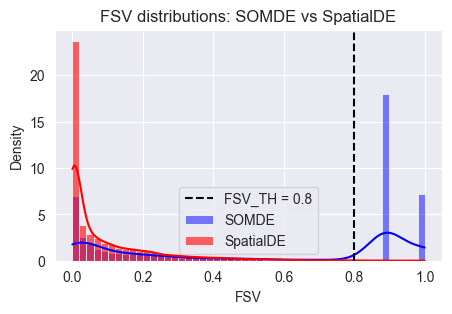

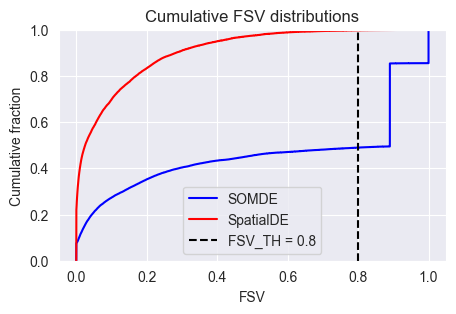

In [32]:
plt.figure(figsize=(5,3))
sns.histplot(somde_res['FSV'], color='blue', label='SOMDE', kde=True, stat="density", bins=50)
sns.histplot(spatialde_res['FSV'], color='red', label='SpatialDE', kde=True, stat="density", bins=50, alpha=0.6)
plt.xlabel('FSV')
plt.ylabel('Density')
plt.title('FSV distributions: SOMDE vs SpatialDE')
plt.legend()
plt.show()

# Optional: Cumulative distributions
plt.figure(figsize=(5, 3))
sns.ecdfplot(somde_res['FSV'], color='blue', label='SOMDE')
sns.ecdfplot(spatialde_res['FSV'], color='red', label='SpatialDE')
plt.xlabel('FSV')
plt.ylabel('Cumulative fraction')
plt.title('Cumulative FSV distributions')
plt.legend()
plt.show()

### Show distribution of qval

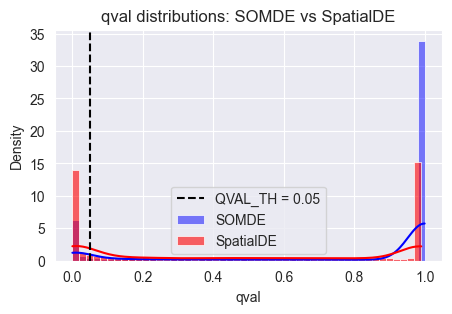

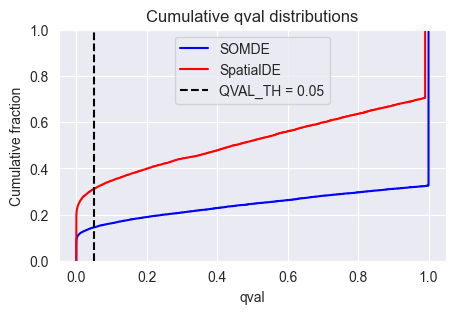

In [33]:
plt.figure(figsize=(5,3))
sns.histplot(somde_res['qval'], color='blue', label='SOMDE', kde=True, stat="density", bins=50)
sns.histplot(spatialde_res['qval'], color='red', label='SpatialDE', kde=True, stat="density", bins=50, alpha=0.6)
plt.xlabel('qval')
plt.ylabel('Density')
plt.title('qval distributions: SOMDE vs SpatialDE')
plt.legend()
plt.show()

# Optional: Cumulative distributions
plt.figure(figsize=(5, 3))
sns.ecdfplot(somde_res['qval'], color='blue', label='SOMDE')
sns.ecdfplot(spatialde_res['qval'], color='red', label='SpatialDE')
plt.xlabel('qval')
plt.ylabel('Cumulative fraction')
plt.title('Cumulative qval distributions')
plt.legend()
plt.show()

# Method comparison plots - SVGs

### Venn diagram
Genes filtered based on **FSV** and **qval**

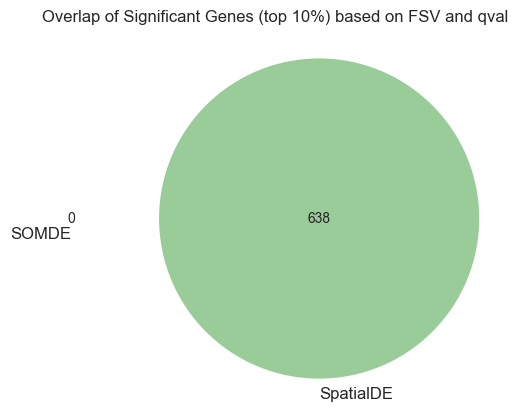

Venn diagram counts saved to method_comparison/SN124_A938797_Rep2/venn_counts.qval+fsv.csv


In [60]:
plt.figure(figsize=(6, 6))
venn2([set_somde_both, set_spatialde_both], set_labels=("SOMDE", "SpatialDE"))
plt.title("Overlap of Significant Genes (top 10%) based on FSV and qval")
plt.savefig("figures/show/method_comparison/" + DATA_FOLDER_NAME + "/venn_diagram.png", dpi=300, bbox_inches='tight')
plt.show()

only_somde = set_somde_both - set_spatialde_both
only_spatialde = set_spatialde_both - set_somde_both
both = set_somde_both & set_spatialde_both
venn_df = pd.DataFrame({
    "Category": ["Only SOMDE", "Only SpatialDE", "Both"],
    "Count": [len(only_somde), len(only_spatialde), len(both)]
})
venn_df.to_csv("method_comparison/" + DATA_FOLDER_NAME + "/venn_counts.qval+fsv.csv", index=False)
print("Venn diagram counts saved to " + "method_comparison/" + DATA_FOLDER_NAME + "/venn_counts.qval+fsv.csv")

### Venn diagram
Genes filtered based only on **qval**

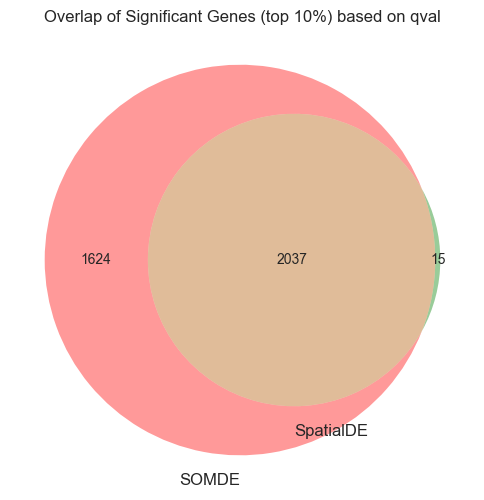

Venn diagram counts saved to method_comparison/SN124_A938797_Rep2/venn_counts.qval.csv


In [61]:
# Plot venn diagram
plt.figure(figsize=(6, 6))
venn2([set_somde_qval, set_spatialde_qval], set_labels=("SOMDE", "SpatialDE"))
plt.title("Overlap of Significant Genes (top 10%) based on qval")
plt.savefig(
    f"figures/show/method_comparison/{DATA_FOLDER_NAME}/venn_diagram.qval.png",
    dpi=300, bbox_inches='tight'
)
plt.show()

# Counts
only_somde = set_somde_qval - set_spatialde_qval
only_spatialde = set_spatialde_qval - set_somde_qval
both = set_somde_qval & set_spatialde_qval

# Save counts
venn_df = pd.DataFrame({
    "Category": ["Only SOMDE", "Only SpatialDE", "Both"],
    "Count": [len(only_somde), len(only_spatialde), len(both)]
})

venn_df.to_csv(
    f"method_comparison/{DATA_FOLDER_NAME}/venn_counts.qval.csv",
    index=False
)

print(
    f"Venn diagram counts saved to method_comparison/{DATA_FOLDER_NAME}/venn_counts.qval.csv"
)

### Venn diagram
Genes filtered based only on **FSV**

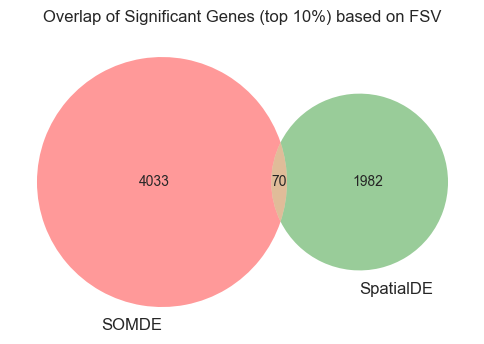

Venn diagram counts saved to method_comparison/SN124_A938797_Rep2/venn_counts.fsv.csv


In [62]:
# Plot venn diagram
plt.figure(figsize=(6, 6))
venn2([set_somde_fsv, set_spatialde_fsv], set_labels=("SOMDE", "SpatialDE"))
plt.title("Overlap of Significant Genes (top 10%) based on FSV")
plt.savefig(
    f"figures/show/method_comparison/{DATA_FOLDER_NAME}/venn_diagram.png",
    dpi=300, bbox_inches='tight'
)
plt.show()

# Calculate categories
only_somde = set_somde_fsv - set_spatialde_fsv
only_spatialde = set_spatialde_fsv - set_somde_fsv
both = set_somde_fsv & set_spatialde_fsv

# Save counts
venn_df = pd.DataFrame({
    "Category": ["Only SOMDE", "Only SpatialDE", "Both"],
    "Count": [len(only_somde), len(only_spatialde), len(both)]
})

venn_df.to_csv(
    f"method_comparison/{DATA_FOLDER_NAME}/venn_counts.fsv.csv",
    index=False
)

print(f"Venn diagram counts saved to method_comparison/{DATA_FOLDER_NAME}/venn_counts.fsv.csv")

### Scatter Plot for FSV

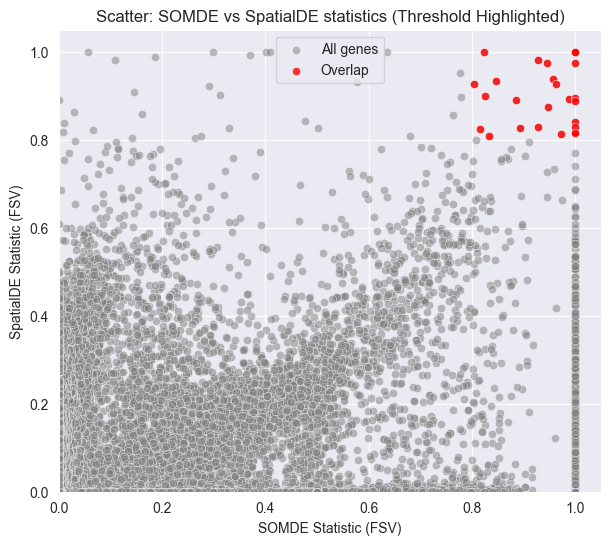

In [37]:
# Merge results and compute overlap
merged = pd.merge(somde_res, spatialde_res, on="g", suffixes=("_somde", "_spatialde"))
merged["overlap"] = merged["g"].isin(set_somde & set_spatialde)

# Filter by thresholds
merged_filtered = merged[
    (merged["FSV_somde"] >= FSV_TH) &
    (merged["FSV_spatialde"] >= FSV_TH)
]

plt.figure(figsize=(7, 6))

# Plot all_requirements points lightly in the background
sns.scatterplot(
    data=merged,
    x="FSV_somde",
    y="FSV_spatialde",
    color="gray",
    alpha=0.5,
    label="All genes"
)

# Highlight non-overlap points (blue)
sns.scatterplot(
    data=merged_filtered[merged_filtered["overlap"] == False],
    x="FSV_somde",
    y="FSV_spatialde",
    color="blue",
    alpha=0.7,
    label="Non-overlap"
)

# Highlight overlap points (gray/red)
sns.scatterplot(
    data=merged_filtered[merged_filtered["overlap"] == True],
    x="FSV_somde",
    y="FSV_spatialde",
    color="red",
    alpha=0.8,
    label="Overlap"
)

plt.title("Scatter: SOMDE vs SpatialDE statistics (Threshold Highlighted)")
plt.xlabel("SOMDE Statistic (FSV)")
plt.ylabel("SpatialDE Statistic (FSV)")
plt.legend()

plt.xlim(0, merged["FSV_somde"].max()*1.05)  # optional: extend a bit beyond max
plt.ylim(0, merged["FSV_spatialde"].max()*1.05)

plt.savefig(f"figures/show/method_comparison/{DATA_FOLDER_NAME}/scatter.overlap.fsv.png",
            dpi=300, bbox_inches='tight')
plt.show()


### Scatter Plot for qval

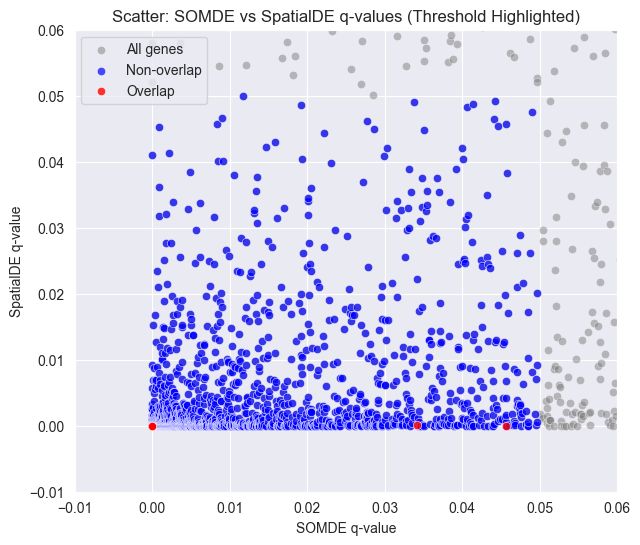

In [38]:
# Merge results and compute overlap
merged = pd.merge(somde_res, spatialde_res, on="g", suffixes=("_somde", "_spatialde"))
merged["overlap"] = merged["g"].isin(set_somde & set_spatialde)

# Filter by q-value thresholds
merged_filtered = merged[
    (merged["qval_somde"] <= QVAL_TH) &
    (merged["qval_spatialde"] <= QVAL_TH)
]

plt.figure(figsize=(7, 6))

# Plot all_requirements points lightly in the background
sns.scatterplot(
    data=merged,
    x="qval_somde",
    y="qval_spatialde",
    color="gray",
    alpha=0.5,
    label="All genes"
)

# Highlight non-overlap points (blue)
sns.scatterplot(
    data=merged_filtered[merged_filtered["overlap"] == False],
    x="qval_somde",
    y="qval_spatialde",
    color="blue",
    alpha=0.7,
    label="Non-overlap"
)

# Highlight overlap points (red)
sns.scatterplot(
    data=merged_filtered[merged_filtered["overlap"] == True],
    x="qval_somde",
    y="qval_spatialde",
    color="red",
    alpha=0.8,
    label="Overlap"
)

plt.title("Scatter: SOMDE vs SpatialDE q-values (Threshold Highlighted)")
plt.xlabel("SOMDE q-value")
plt.ylabel("SpatialDE q-value")
plt.legend()

plt.xlim(-0.01, 0.06)
plt.ylim(-0.01, 0.06)

plt.savefig(f"figures/show/method_comparison/{DATA_FOLDER_NAME}/scatter.overlap.qval.png",
            dpi=300, bbox_inches='tight')
plt.show()


### Scatter Plot for selected genes by FSV

In [39]:
def classify_gene_thresholded_FSV(row):
    if row["FSV_somde"] >= FSV_TH and row["qval_somde"] <= QVAL_TH and \
       row["FSV_spatialde"] < FSV_TH:
        return "Only SOMDE"
    elif row["FSV_spatialde"] >= FSV_TH and row["qval_spatialde"] <= QVAL_TH and \
         row["FSV_somde"] < FSV_TH:
        return "Only SpatialDE"
    elif row["FSV_somde"] >= FSV_TH and row["qval_somde"] <= QVAL_TH and \
         row["FSV_spatialde"] >= FSV_TH and row["qval_spatialde"] <= QVAL_TH:
        return "Both"
    else:
        return "None"

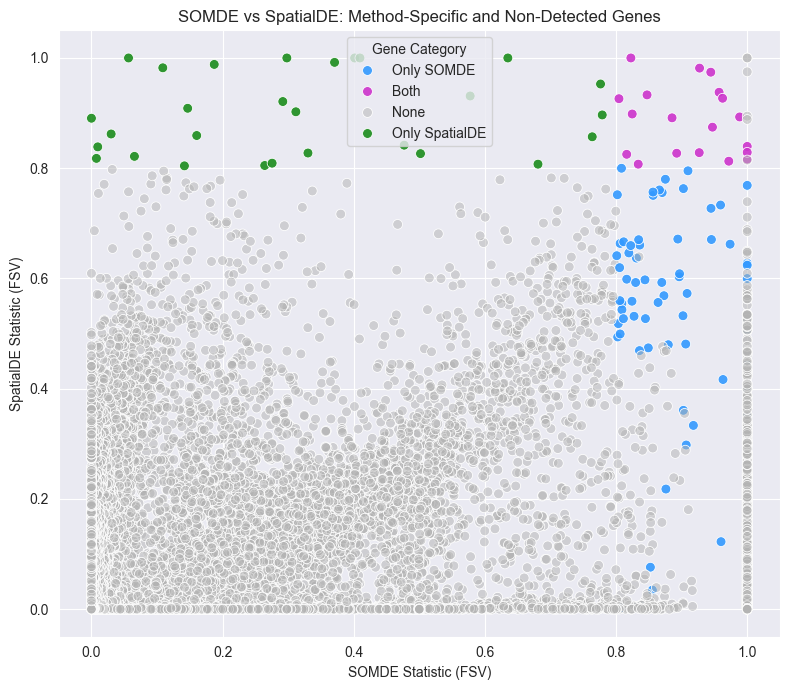

In [40]:
merged["category"] = merged.apply(classify_gene_thresholded_FSV, axis=1)

# Keep only 3 categories (exclude None if desired)
plot_data = merged[merged["category"].notna()]

plt.figure(figsize=(8, 7))


palette = {
    "Only SOMDE": (0.2, 0.6, 1.0, 0.9),      # blue
    "Only SpatialDE": (0.0, 0.5, 0.0, 0.8),  # green
    "Both": (0.8, 0.2, 0.8, 0.9),            # purple
    "None": (0.7, 0.7, 0.7, 0.5)             # transparent gray
}

sns.scatterplot(
    data=plot_data,
    x="FSV_somde",
    y="FSV_spatialde",
    hue="category",
    palette=palette,
    s=50
)

plt.title("SOMDE vs SpatialDE: Method-Specific and Non-Detected Genes")
plt.xlabel("SOMDE Statistic (FSV)")
plt.ylabel("SpatialDE Statistic (FSV)")
plt.legend(title="Gene Category")
plt.tight_layout()
plt.savefig(f"figures/show/method_comparison/{DATA_FOLDER_NAME}/scatter.somde_vs_spatialde.fsv.png",
            dpi=300, bbox_inches='tight')
plt.show()

### Scatter Plot for selected genes by qval

In [41]:
# Assign categories based on q-value thresholds
def classify_gene_qval(row):
    if row["qval_somde"] <= QVAL_TH and row["qval_spatialde"] > QVAL_TH:
        return "Only SOMDE"
    elif row["qval_spatialde"] <= QVAL_TH and row["qval_somde"] > QVAL_TH:
        return "Only SpatialDE"
    elif row["qval_somde"] <= QVAL_TH and row["qval_spatialde"] <= QVAL_TH:
        return "Both"
    else:
        return "None"

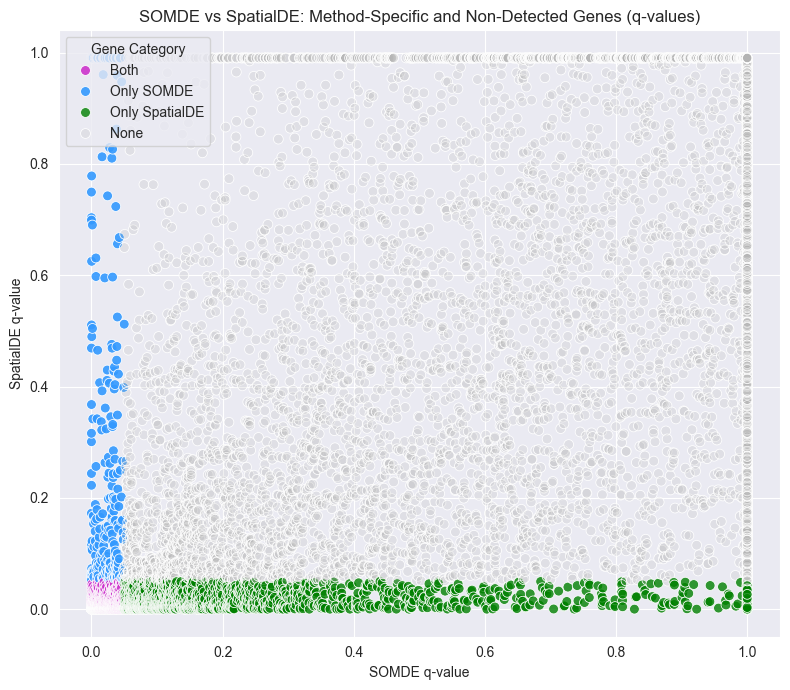

In [42]:
merged["category"] = merged.apply(classify_gene_qval, axis=1)

# Keep only points with a category
plot_data = merged[merged["category"].notna()]

plt.figure(figsize=(8, 7))

palette = {
    "Only SOMDE": (0.2, 0.6, 1.0, 0.9),      # blue
    "Only SpatialDE": (0.0, 0.5, 0.0, 0.8),  # green
    "Both": (0.8, 0.2, 0.8, 0.9),            # purple
    "None": (0.7, 0.7, 0.7, 0.2)             # transparent gray
}

sns.scatterplot(
    data=plot_data,
    x="qval_somde",
    y="qval_spatialde",
    hue="category",
    palette=palette,
    s=50
)

plt.title("SOMDE vs SpatialDE: Method-Specific and Non-Detected Genes (q-values)")
plt.xlabel("SOMDE q-value")
plt.ylabel("SpatialDE q-value")
plt.legend(title="Gene Category")
plt.tight_layout()
plt.savefig(f"figures/show/method_comparison/{DATA_FOLDER_NAME}/scatter.somde_vs_spatialde.qval.png",
            dpi=300, bbox_inches='tight')
plt.show()